# ObjectDetection_OpenCV

Credit: https://www.youtube.com/watch?v=RFqvTmEFtOE

In [151]:
#!pip install opencv-python
import cv2

In [152]:
import matplotlib.pyplot as plt

download--> MobileNet-SSD v3 -->    weights    & config

from this link: 

https://github.com/opencv/opencv/wiki/TensorFlow-Object-Detection-API
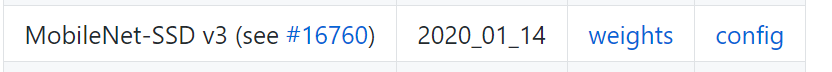

In [153]:
config_file= "ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"

In [154]:
frozen_model = "frozen_inference_graph.pb"

In [155]:
model= cv2.dnn_DetectionModel(frozen_model,config_file)

the above model is trained on coco datatset, copy those labels of coco datatset.

from here:
https://github.com/pjreddie/darknet/blob/master/data/coco.names

Copy these all 80 labels and paste  & save it in "Labels.txt"

In [156]:
classLabels = []
file_name = "Labels.txt"
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
#     classLabels.append(fpt.read())

In [157]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


***
Preprocess i/p image according to configuration of Mobilenet:

In [158]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) # 255/2=127.5
model.setInputMean((127.5,127.5,127.5)) #mobilenet ==> [-1,1]
model.setInputSwapRB(True)

<dnn_Model 000001AA97851230>

***

In [159]:
img = cv2.imread('men_style.jpg')

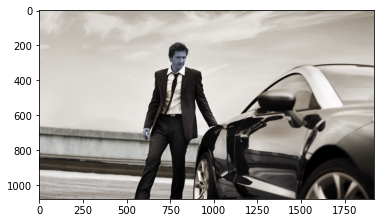

In [160]:
plt.imshow(img) #brg

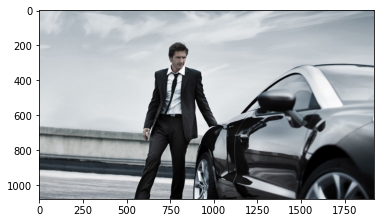

In [161]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) 

In [162]:
ClassIndex, confidence,bbox=  model.detect(img, confThreshold=0.5)

In [163]:
ClassIndex

array([[3],
       [1]], dtype=int32)

In [164]:
ClassIndex

array([[3],
       [1]], dtype=int32)

In [165]:
font_scale =3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd , conf , boxes in zip(ClassIndex.flatten() , confidence.flatten() ,bbox):
    cv2.rectangle(img , boxes, (2555,0,0) , 2)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[0]+10,boxes[1]+40), font ,fontScale=font_scale , color=(0,0,255), thickness=3)
    cv2.putText(img, str(conf), (boxes[0]+10,boxes[1]+100), font ,fontScale=font_scale , color=(0,255,0), thickness=3)

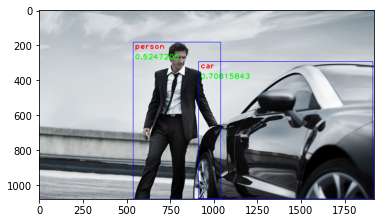

In [166]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_RGB2BGR)) 

## Video Demo

In [171]:
cap = cv2.VideoCapture("London Walk.mp4")
# cap = cv2.VideoCapture(0) #fo webcam
if not cap.isOpened():
    cap=cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't Open Video")

font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
    
    
while(True):
    ret, frame = cap.read()

    ClassIndex , confidence , bbox = model.detect(frame,confThreshold=0.5)
    
#     print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(),bbox):
            if (ClassInd<=80): 
                cv2.rectangle(frame, boxes, (255, 0, 0), 2) 
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale=font_scale, color=(0,0,255), thickness=3)
#                 cv2.putText(frame, str(conf), (boxes[0]+10,boxes[1]+100), font ,fontScale=font_scale , color=(0,255,0), thickness=3)
    
    cv2.imshow("Object Detection Tutorial", frame)
    if cv2.waitKey (2) & 0xFF == ord('q'):      #Press q to exit
        break

cap.release()
cv2.destroyAllWindows()